# Mohammad Faseeh Ahmed
# To Explore Supervised Machine Learning

# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?

### Importing The Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading The Dataset

In [47]:
url="http://bit.ly/w-data"
# Reading the datasets from the given URL
data=pd.read_csv(url)
#Printing  the first five elements of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##  Data Analysing

In [48]:
# describing The data
print(data.describe())
print()
#Information about the dataset
print(data.info()) 
print() 

# Shape of the data
print(data.shape) 

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

(25, 2)


## Data Visualization
#### Plotting the data on 2-D Graph for finding relationship between data.
#### Creating the plot with following script

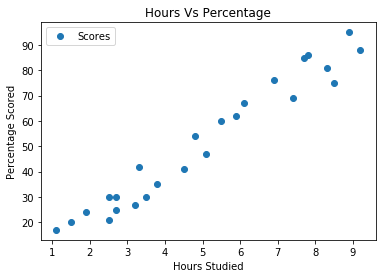

In [49]:
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours Vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relationship  between the number of hours studied and percentage of score.

## Preparing the Data for Training

In [50]:
# Dividing  The Independent attribute as Y and Dependent attribute as X
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
print(X.shape)
print(y.shape)


(25, 1)
(25,)


###  Now that we got our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [51]:
from sklearn.model_selection import train_test_split as tts
# Spliting the data into train and test sets into 80:20 ratio.
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)

## Training The algorithm
### Now that We have split our data into training and testing sets, and now is finally the time to train our algorithm. We'll do this by using Scikit-Learn's built-in LinearRegression() method
### Fitting Simple Linear Regression to the Training set

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
 # Coefficient
m = reg.coef_
# Intercept
c = reg.intercept_ 
print("Training complete.")

Training complete.


### Plotting the Regression line

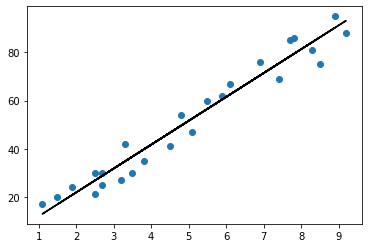

In [53]:
# Plotting the regression line
line =m*X+c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, 'black')
plt.show()

##  Predicting the Test set results
### Now that we have trained our algorithm, it's time to make some predictions.

In [54]:
# Predicting the scores
y_pred = reg.predict(X_test)
y_pred.shape

(5,)

In [55]:
df=pd.DataFrame({'Actual':y_test,
                'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [56]:
# testing with our own data
hours = np.array(9.25)
own_pre = reg.predict(hours.reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pre[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Visualising the Training set results

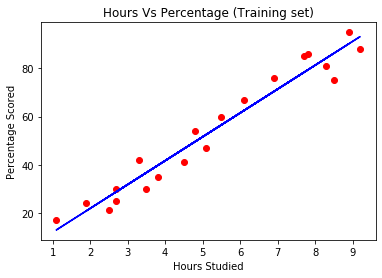

In [57]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title("Hours Vs Percentage (Training set)")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

## Visualizing The Test Set Results

Text(0, 0.5, 'Percentage Scored')

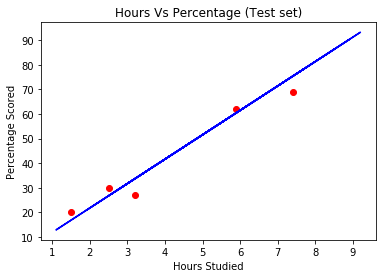

In [58]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("Hours Vs Percentage (Test set)")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")

## Evaluating the Model

In [59]:
from sklearn.metrics import mean_squared_error as mse ,mean_absolute_error as mae
print('Mean Squared Error:', mse(y_test, y_pred))
print('Mean Absolute Error:',mae(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mse(y_test,y_pred)))

Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665
